In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas.api.types import CategoricalDtype
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
# Importing data extracted from Capital bikeshare website 

jan=pd.read_csv("2019 Data/201901-capitalbikeshare-tripdata.csv")
feb=pd.read_csv("2019 Data/201902-capitalbikeshare-tripdata.csv")
mar=pd.read_csv("2019 Data/201903-capitalbikeshare-tripdata.csv")
apr=pd.read_csv("2019 Data/201904-capitalbikeshare-tripdata.csv")
may=pd.read_csv("2019 Data/201905-capitalbikeshare-tripdata.csv")
jun=pd.read_csv("2019 Data/201906-capitalbikeshare-tripdata.csv")
jul=pd.read_csv("2019 Data/201907-capitalbikeshare-tripdata.txt")
aug=pd.read_csv("2019 Data/201908-capitalbikeshare-tripdata.csv")
sep=pd.read_csv("2019 Data/201909-capitalbikeshare-tripdata.csv")
ott=pd.read_csv("2019 Data/201910-capitalbikeshare-tripdata.csv")
nov=pd.read_csv("2019 Data/201911-capitalbikeshare-tripdata.csv")
dec=pd.read_csv("2019 Data/201912-capitalbikeshare-tripdata.csv")

In [3]:
# 2019 data merged
# total of 3398417 rides

y2019 = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,ott,nov,dec])
y2019.shape

(3398417, 9)

In [4]:
# a look to the Dataframe 

y2019.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member


In [5]:
# check on data type

y2019.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [6]:
# data 2019 exported in form of csv

y2019.to_csv("y2019.csv")

In [7]:
# Statistical analysis of complete data
# to notice: count of rides - mean of ride in seconds - min ride - max ride

y2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,3398417.0,1069.698068,2205.485002,60.0,396.0,680.0,1152.0,86365.0
Start station number,3398417.0,31337.437357,448.849637,0.0,31204.0,31265.0,31524.0,32609.0
End station number,3398417.0,31337.985144,443.974443,0.0,31212.0,31264.0,31524.0,32609.0


In [8]:
# Getting insights on Ride duration
# converting mean ride duration from seconds to minutes
# converting max ride duration from seconds to hours

print(y2019.Duration.mean() / 60)
print((y2019.Duration.max() / 60)/60)

17.82830113746096
23.99027777777778


In [9]:
# top 20 routes in 2019
sum_column = y2019["Start station"] +"//" + y2019["End station"]
sum_column.value_counts().head(20)

Smithsonian-National Mall / Jefferson Dr & 12th St SW//Smithsonian-National Mall / Jefferson Dr & 12th St SW    4912
Columbus Circle / Union Station//6th & H St NE                                                                  4355
6th & H St NE//Columbus Circle / Union Station                                                                  3590
4th St & Madison Dr NW//4th St & Madison Dr NW                                                                  3528
Jefferson Dr & 14th St SW//Jefferson Dr & 14th St SW                                                            3522
Columbus Circle / Union Station//8th & F St NE                                                                  3513
Lincoln Memorial//Jefferson Memorial                                                                            3466
Jefferson Dr & 14th St SW//Lincoln Memorial                                                                     3066
8th & F St NE//Columbus Circle / Union Station                  

In [10]:
# saving file to be represented on tableau

y2019["Start station"].to_csv("StartStation.csv")

In [11]:
# converting int to str to check on station number most frequent routes

y2019["Start station number"] = y2019["Start station number"].astype(str)
y2019["End station number"] = y2019["End station number"].astype(str)

In [12]:
# same results as previously gained, consistent data

sum_column = y2019["Start station number"] + "//"+  y2019["End station number"]
sum_column.value_counts().head(20)

31248//31248    4912
31623//31615    4355
31615//31623    3590
31288//31288    3528
31247//31247    3522
31623//31631    3513
31258//31249    3466
31247//31258    3066
31631//31623    2976
31248//31258    2899
31321//31321    2882
31290//31258    2868
31289//31289    2683
31258//31258    2567
31290//31290    2559
31124//31126    2526
31064//31064    2429
31258//31247    2425
31613//31619    2375
31640//31623    2333
dtype: int64

In [13]:
# count of bikes used in 2019 

y2019["Bike number"].nunique()

6052

In [14]:
# 6052 bikes were used on 2019. W24093 most used bike with 1642 rides

y2019["Bike number"].value_counts().head(10)

W24093    1642
W23952    1564
W24159    1473
W23929    1469
W24112    1438
W23774    1434
W24119    1429
W23578    1429
W24116    1428
W23725    1413
Name: Bike number, dtype: int64

In [15]:
# Bike usage in hour per bike

grouped_bike= ((y2019.groupby(["Bike number"])["Duration"].sum()/60)/60).reset_index()
grouped_bike=grouped_bike.sort_values(by=["Duration"], ascending=False)
grouped_bike.head(10)

,Bike number,Duration
5300,W23815,481.268889
5578,W24093,467.183889
5437,W23952,455.491944
5601,W24116,454.208611
5495,W24010,449.419722
5532,W24047,445.258333
5647,W24162,440.029444
5388,W23903,438.997500
5066,W23578,438.298611
5414,W23929,434.051944


In [16]:
# top 10 ending stations

y2019["End station"].value_counts()[0:10]

Columbus Circle / Union Station                          62977
15th & P St NW                                           38456
Massachusetts Ave & Dupont Circle NW                     35811
Lincoln Memorial                                         35026
Henry Bacon Dr & Lincoln Memorial Circle NW              34712
Jefferson Dr & 14th St SW                                33636
4th St & Madison Dr NW                                   33223
Smithsonian-National Mall / Jefferson Dr & 12th St SW    32994
1st & M St NE                                            32444
New Hampshire Ave & T St NW                              30583
Name: End station, dtype: int64

In [17]:
# top 10 starting stations

station_count= y2019["Start station"].value_counts()[0:10]

In [18]:
station_count

Columbus Circle / Union Station                          58533
15th & P St NW                                           35382
Lincoln Memorial                                         35268
14th & Irving St NW                                      34900
New Hampshire Ave & T St NW                              34667
Henry Bacon Dr & Lincoln Memorial Circle NW              34185
4th St & Madison Dr NW                                   32924
Jefferson Dr & 14th St SW                                32180
1st & M St NE                                            31545
Smithsonian-National Mall / Jefferson Dr & 12th St SW    31474
Name: Start station, dtype: int64

In [19]:
# plotting available styles 

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


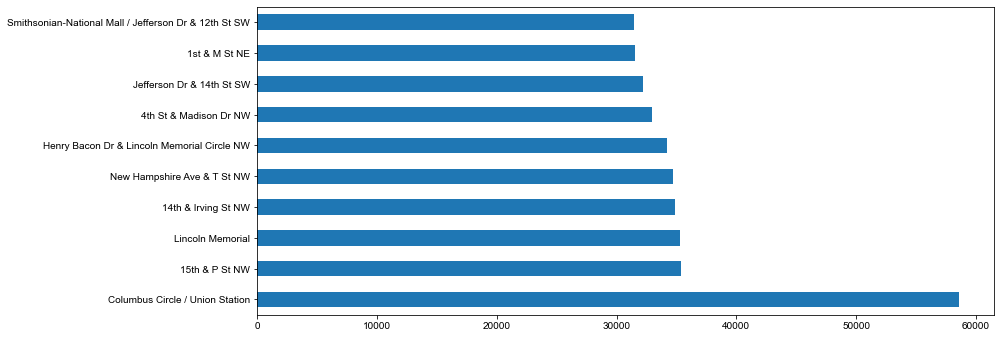

In [20]:
# Plot representing <most used stations in 2019

plt.figure(figsize=(14,4.8))
ax = station_count.plot.barh()
plt.style.use("seaborn-darkgrid")
plt.tight_layout()
plt.savefig('Most used stations.png', dpi = 300)

In [22]:
# conversion of string data to timestamp

y2019["Start date"] = pd.to_datetime(y2019["Start date"],errors='ignore')
y2019["End date"] = pd.to_datetime(y2019["End date"],errors='ignore')

In [23]:
y2019.dtypes

Duration                         int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number            object
Start station                   object
End station number              object
End station                     object
Bike number                     object
Member type                     object
dtype: object

In [24]:
# creating new column with day of the week

y2019["Day_of_week"] = y2019['Start date'].dt.strftime('%A')

In [25]:
# counting values to check on how many rides took place in the different day of the week

ridebyday = y2019["Day_of_week"].value_counts()
ridebyday

Wednesday    513457
Friday       510515
Tuesday      510178
Thursday     503090
Saturday     496048
Monday       465170
Sunday       399959
Name: Day_of_week, dtype: int64

In [26]:
# changing order of displayed day of the week

weekday= ["Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"]
ridebyday.index = pd.CategoricalIndex(ridebyday.index, categories=weekday, ordered=True)
ridebyday = ridebyday.sort_index()

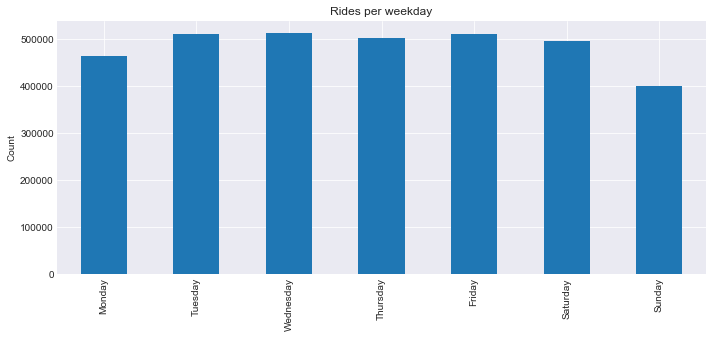

In [27]:
# Distribution of rides over the weekday

plt.figure(figsize=(10,4.8))
ridebyday.plot(kind="bar")
plt.style.use("seaborn-darkgrid")
plt.title("Rides per weekday")
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Count of rides per weekday.png', dpi = 300)

In [28]:
ridebyday2=ridebyday.to_frame()

In [29]:
# adding count of weekdays in 2019
ridebyday2["count_of_days"]= [52,53,52,52,52,52,52]

In [30]:
ridebyday2 = ridebyday2.rename(columns={"Day_of_week":"count_of_rides"})


In [31]:
# Average rides per day of the week
ridebyday2["average_per_day"] = round(ridebyday2.count_of_rides / ridebyday2.count_of_days)
ridebyday2

,count_of_rides,count_of_days,average_per_day
Monday,465170,52,8946.0
Tuesday,510178,53,9626.0
Wednesday,513457,52,9874.0
Thursday,503090,52,9675.0
Friday,510515,52,9818.0
Saturday,496048,52,9539.0
Sunday,399959,52,7692.0


<Figure size 720x345.6 with 0 Axes>

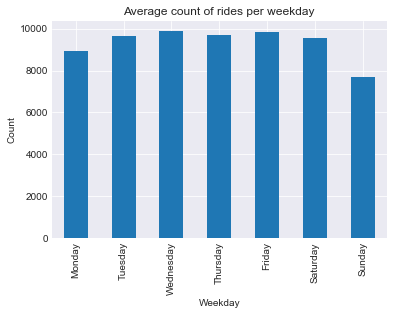

In [32]:
# Plotting Average rides per day of the week
plt.figure(figsize=(10,4.8))
ridebyday2.plot(kind="bar",y="average_per_day", legend=None)
plt.style.use("seaborn-darkgrid")
plt.title("Average count of rides per weekday")
plt.ylabel('Count')
plt.xlabel('Weekday')
# plt.tight_layout()
plt.savefig('Average count of rides per weekday.png', dpi = 300)

In [33]:
# Transforming Duration, originally in seconds, to duration minute
y2019["Duration_min"]= (y2019["Duration"]/60).round(0)
y2019.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Day_of_week,Duration_min
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member,Tuesday,4.0
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual,Tuesday,26.0
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual,Tuesday,3.0
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member,Tuesday,4.0
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member,Tuesday,22.0


In [34]:
# Average duration of rides per weekday
avg_duration = round(y2019.groupby("Day_of_week")["Duration_min"].mean(),1)
avg_duration.index = pd.CategoricalIndex(avg_duration.index, categories=weekday, ordered=True)
avg_duration = avg_duration.sort_index()
avg_duration

Day_of_week
Monday       16.3
Tuesday      15.7
Wednesday    15.5
Thursday     15.8
Friday       16.9
Saturday     23.4
Sunday       22.2
Name: Duration_min, dtype: float64

In [35]:
tot_duration = y2019.groupby("Day_of_week")["Duration_min"].sum()
tot_duration.index = pd.CategoricalIndex(tot_duration.index, categories=weekday, ordered=True)
tot_duration = tot_duration.sort_index()
tot_duration

Day_of_week
Monday        7584227.0
Tuesday       7990117.0
Wednesday     7982521.0
Thursday      7943911.0
Friday        8608423.0
Saturday     11593968.0
Sunday        8884490.0
Name: Duration_min, dtype: float64

In [36]:
ridebyday2["use_tot_minute"] = [7584227, 7990117, 7982521, 7943911, 8608423,11593968,8884490]
ridebyday2.head()

,count_of_rides,count_of_days,average_per_day,use_tot_minute
Monday,465170,52,8946.0,7584227
Tuesday,510178,53,9626.0,7990117
Wednesday,513457,52,9874.0,7982521
Thursday,503090,52,9675.0,7943911
Friday,510515,52,9818.0,8608423


In [37]:
ridebyday2["use_avg_minute"] = [16.3, 15.7, 15.5, 15.8, 16.9,23.4,22.2]
ridebyday2.head()

,count_of_rides,count_of_days,average_per_day,use_tot_minute,use_avg_minute
Monday,465170,52,8946.0,7584227,16.3
Tuesday,510178,53,9626.0,7990117,15.7
Wednesday,513457,52,9874.0,7982521,15.5
Thursday,503090,52,9675.0,7943911,15.8
Friday,510515,52,9818.0,8608423,16.9


<Figure size 720x345.6 with 0 Axes>

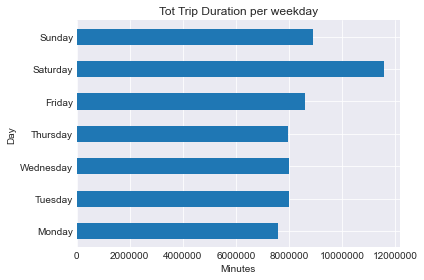

In [38]:
plt.figure(figsize=(10,4.8))
ax = ridebyday2.plot.barh(y="use_tot_minute",legend=None)
matplotlib.style.use("seaborn-darkgrid")
plt.ylabel('Day')
plt.xlabel('Minutes')
#plt.xticks( labels=("2", '4','6',"8","10","12") )
plt.title("Tot Trip Duration per weekday")
plt.ticklabel_format(style = 'plain', axis="x")
plt.tight_layout()
plt.savefig('Total bike use per day (minutes).png', dpi = 300)

<Figure size 720x345.6 with 0 Axes>

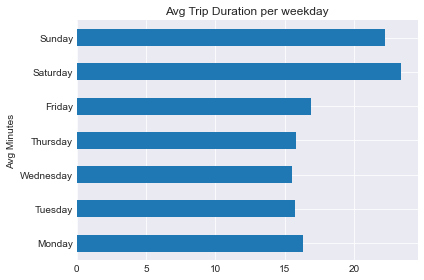

In [39]:
plt.figure(figsize=(10,4.8))
ax = ridebyday2.plot.barh(y="use_avg_minute",legend=None)
matplotlib.style.use("seaborn-darkgrid")
plt.ylabel('Avg Minutes')
plt.title("Avg Trip Duration per weekday")
plt.tight_layout()
plt.savefig('Avg minutes per day.png', dpi = 300)

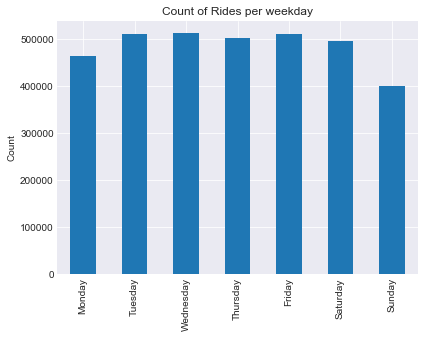

In [40]:
plt.figure(figsize=(6,4.8))
ax1= ridebyday.plot.bar()
plt.title("Count of Rides per weekday")
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Rides per weekday.png', dpi = 300)

In [41]:
y2019['hour'] = y2019["Start date"].dt.hour


In [54]:
# Duration of the rides by pick up hour
by_hour= y2019.groupby("hour")["Duration_min"].mean().to_frame(name= "Duration_min").reset_index()

,hour,Duration_min
0,0,15.633792
1,1,16.265232
2,2,16.339370
3,3,17.495764
4,4,14.528421
5,5,10.840786
6,6,11.225991
7,7,11.759224
8,8,12.443291
9,9,13.485816


In [44]:
# Number of rides by pickup hour

ride_count_hour= y2019["hour"].value_counts().rename_axis("hour").reset_index(name="Count")
ride_count_hour.sort_values(by="hour", inplace=True)

,hour,Count
18,0,28036
20,1,15149
21,2,9718
23,3,5075
22,4,5876
19,5,25582
15,6,78326
9,7,184080
1,8,308053
6,9,189821


In [63]:
# merging the 2 dataframes

by_hour_fin= pd.merge(left=by_hour, right=ride_count_hour, how="inner", on="hour")

,hour,Duration_min,Count
0,0,15.633792,28036
1,1,16.265232,15149
2,2,16.339370,9718
3,3,17.495764,5075
4,4,14.528421,5876
5,5,10.840786,25582
6,6,11.225991,78326
7,7,11.759224,184080
8,8,12.443291,308053
9,9,13.485816,189821


<Figure size 720x345.6 with 0 Axes>

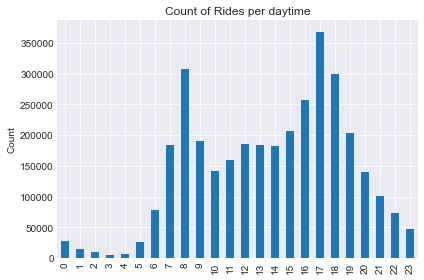

In [47]:
# plotting ride distribution by hour 2019 

plt.figure(figsize=(10,4.8))
ax1= by_hour_fin.plot.bar(y="Count",legend=None)
plt.title("Count of Rides per daytime")
plt.ylabel('Count')
plt.xlabel('Hour of the day')
plt.tight_layout()
plt.savefig('Rides per dayhour.png', dpi = 300)

In [ ]:
# plotting ride avg duration by hour 2019 

plt.figure(figsize=(10,4.8))
ax1= by_hour_fin.plot.bar(y="Duration_min",legend=None)
plt.title("Avg Ride Duration per dayhour")
plt.ylabel('Avg minutes')
plt.xlabel('Hour of the day')
plt.tight_layout()
plt.savefig('Avg Ride Duration per dayhour.png', dpi = 300)

In [57]:
# creating df representing Count of rides per minute Duration

y2019.loc[y2019.Duration_min > 60, "Duration_min"] = 61
frequency= y2019.Duration_min.value_counts().rename_axis("Ride_duration").reset_index()
frequency.sort_values(by="Ride_duration", inplace= True)
frequency.columns=["Ride_duration", "Ride_Count"]
frequency

,Ride_duration,Ride_Count
33,1.0,12199
19,2.0,70527
9,3.0,135842
4,4.0,192047
1,5.0,205753
...,...,...
57,57.0,3388
58,58.0,3370
60,59.0,3122
59,60.0,3185


In [58]:
frequency.dtypes

Ride_duration    float64
Ride_Count         int64
dtype: object

In [59]:
frequency.Ride_duration= frequency.Ride_duration.astype("int64")

<Figure size 864x345.6 with 0 Axes>

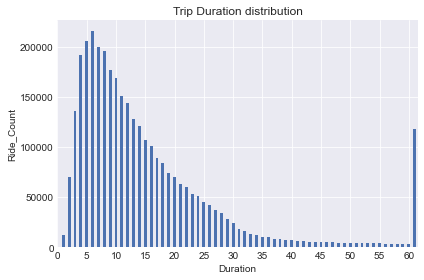

In [62]:
# plotting count of rides per trip duration 2019

plt.figure(figsize=(12,4.8))
ax = frequency.plot.bar(x="Ride_duration", y="Ride_Count", legend=None)
plt.style.use("seaborn-deep")
plt.xticks(np.arange(-1,60,5),(0,5,10,15,20,25,30,35,40,45,50,55,60),rotation="horizontal")
plt.title("Trip Duration distribution")
plt.xlabel("Duration")
plt.ylabel("Ride_Count")
plt.tight_layout()
plt.savefig('Trip Duration distribution.png', dpi = 300)